# Black Friday Sale : Kaggle.com

### Tasks to perform

The purchase col column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

### DATA PREPROCESSING

1. Check basic statistics of the dataset

2. Check for missing values in the data

3. Check for unique values in data

### Perform EDA

1. Purchase Distribution

2. Check for outliers

3. Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc

4. Drop unnecessary fields

5. Convert categorical data into integer using map function (e.g 'Gender' column)

6. Missing value treatment

7. Rename columns

8. Fill nan values

9. Map range variables into integers (e.g 'Age' column)

### Data Visualisation

#### visualize an individual column
1. Age vs Purchased
2. Occupation vs Purchased
3. Productcategory1 vs Purchased
4. Productcategory2 vs Purchased
5. Productcategory3 vs Purchased
6. City category pie chart

## Exploratory Data Analysis

#### We Will Analyze To Find Below Stuff:
1. Missing Values
2. All the Numerical Feature
3. Distribution Of Numerical Feature
4. Categorical Feature
5. Outliers
6. Relationship Between The Independent And Dependent Feature
7. Temporal Feature


#### Import Library



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import json
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline


## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### Dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Dataset Rows and Columns

In [3]:
data.shape

(550068, 12)

In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


-------------------------------------------------------------------------------------------------------------------
## 2. Check for outliers


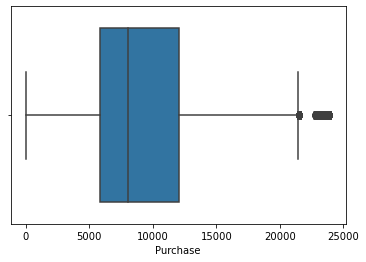

In [6]:


sns.boxplot(x = data['Purchase'])
plt.show()



There is Outliers In the Output Columns

-------------------------------------------------------------------------------------------------------------

## Analyze Missing Values
1. Python Code
2. Visualisation

In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
feature_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>=1]

------------------------------------------------------------------------------------------------

## % Missing Values

In [9]:

for feature in feature_with_nan:
    print(feature, np.round(data[feature].isnull().mean()*100), "% Of Missing Values")
    

Product_Category_2 32.0 % Of Missing Values
Product_Category_3 70.0 % Of Missing Values


-------------------------------------------------------------------------------------------------
## Lets Plot Some Amazing Diagram
1. take Each And Every Feature  
2. feature has NAN value if Yes = 1 , No = 0
3. Group by (1,0) 
4. Plot Graph with Dependent Feature = purchase
5. Outliers

C:\Users\SHAIKH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

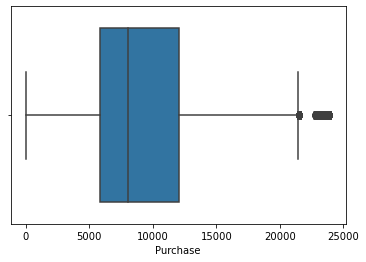

In [10]:
# Boxplot
sns.boxplot(data['Purchase']) # There is a Outliers in dataset

<AxesSubplot:>

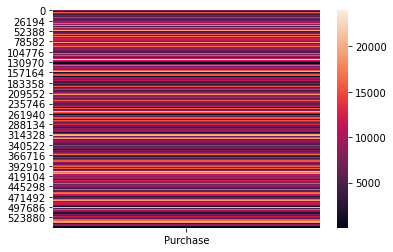

In [11]:
# Heatmap

sns.heatmap(pd.DataFrame(data['Purchase']))

In [12]:
import missingno as msno

<AxesSubplot:>

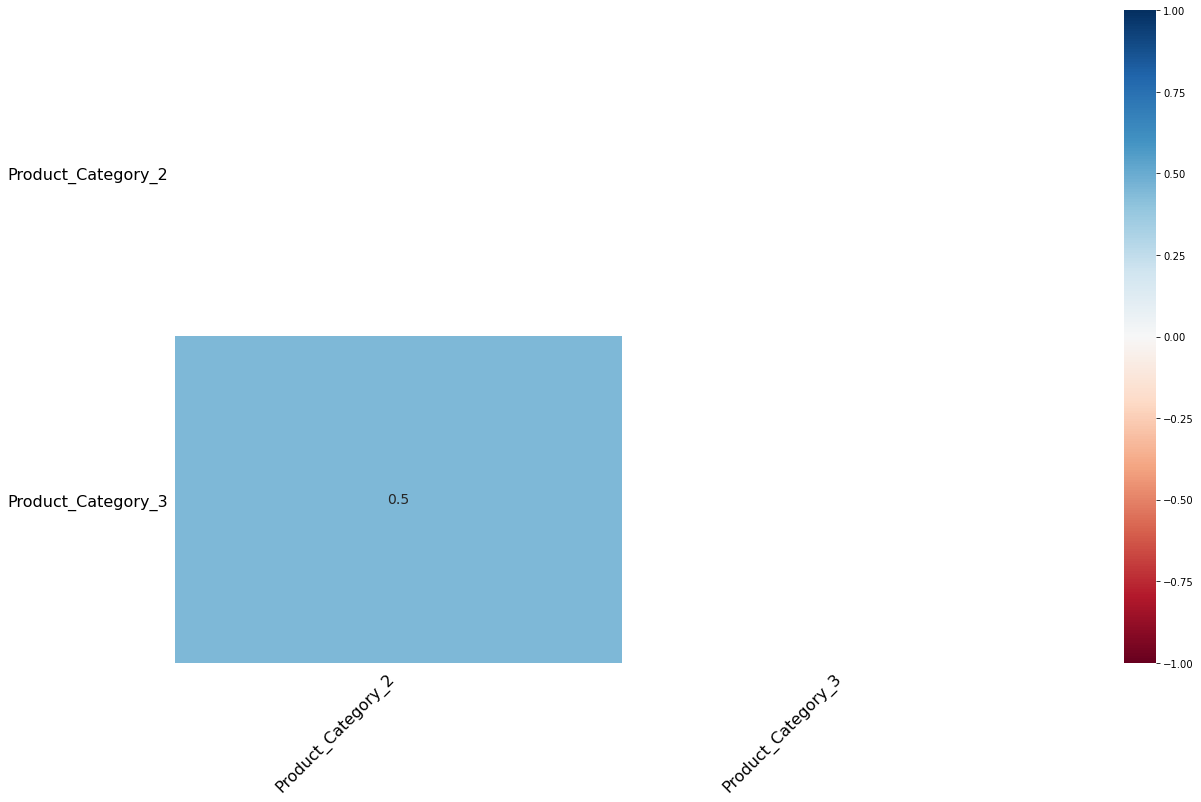

In [13]:
msno.heatmap(data)

<AxesSubplot:>

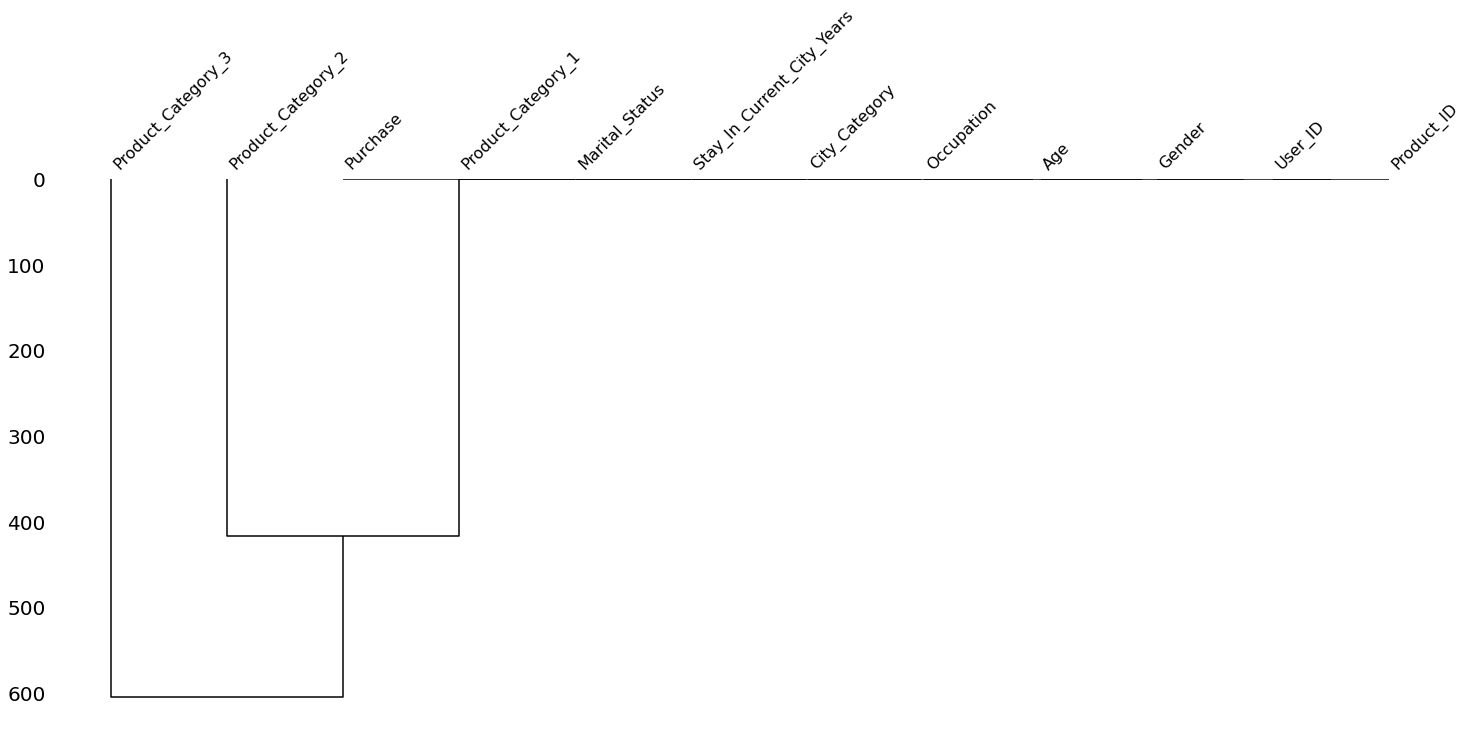

In [14]:
msno.dendrogram(data)

In [15]:
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_widgets()

---------------------------------------------------------------------------
## Feature has NAN value if Yes = 1 , No = 0

<AxesSubplot:xlabel='Product_Category_2'>

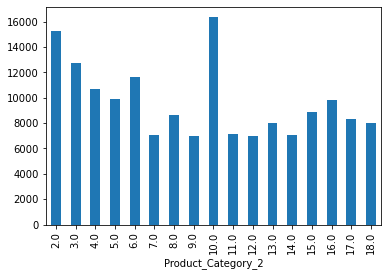

In [16]:
data.groupby("Product_Category_2")['Purchase'].median().plot.bar()


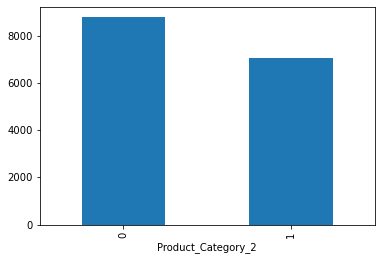

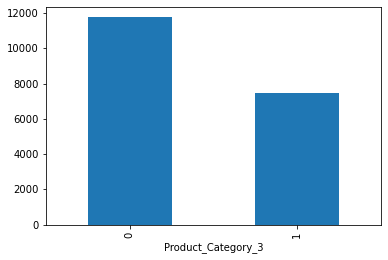

In [17]:
## Graph Relationship between Missing Value Feature & Output Feature Purchase

for feature in feature_with_nan:
    df = data.copy()
    
    # make a variables that indicate 1 if the observation was missing or 0 otherwise
    df[feature] = np.where(df[feature].isnull(),1,0)
    
    # Calculate Mean of Purchase where the Information is missing or present
    df.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.
So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

------------------------------------------------------------------------------------------------
# Analyze All the Numerical Feature

## 3. Analysis by 
 
2. Marital Status, 
3. occupation, 

4. occupation vs purchase,


In [18]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes!='O']
print(len(numerical_feature))
numerical_feature


7


['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [19]:
data[numerical_feature].head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969


In [20]:
data[numerical_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_ID             550068 non-null  int64  
 1   Occupation          550068 non-null  int64  
 2   Marital_Status      550068 non-null  int64  
 3   Product_Category_1  550068 non-null  int64  
 4   Product_Category_2  376430 non-null  float64
 5   Product_Category_3  166821 non-null  float64
 6   Purchase            550068 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 29.4 MB


In [21]:
# Find Unique Feature
for feature in numerical_feature:
    print(feature, data[feature].unique())

User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Marital_Status [0 1]
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase [ 8370 15200  1422 ...   135   123   613]


-----------------------------------------------------------------------------------------------
## Analyze Temporal Variable ( Eg. Date-time Variable)
1. findout date time variable
2. findout relationship with Output feature

In [22]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [23]:
year_feature = [feature for feature in data.columns if 'Yr' in feature or 'Year' in feature]
data[year_feature].head()

,Stay_In_Current_City_Years
0,2
1,2
2,2
3,2
4,4+


In [24]:
data["Stay_In_Current_City_Years"].unique() # Already in Sub catogorised in 5 part

array(['2', '4+', '3', '1', '0'], dtype=object)

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

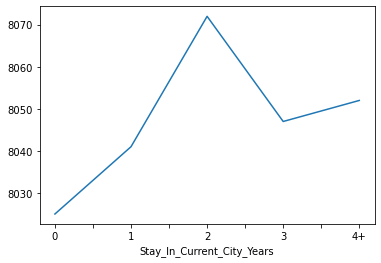

In [25]:
# Lets see Graphical Representation how purchase pattern is Year by year
data.groupby(year_feature)['Purchase'].median().plot()

It shows that High Purchase in 2 Years  and then goes downn in year 3 

In [26]:
# plt.scatter(year_feature, data['Purchase'])
# plt.xlabel('Years')
# plt.ylabel('Purchase')
# plt.title('Stay_In_Current_City_Years')

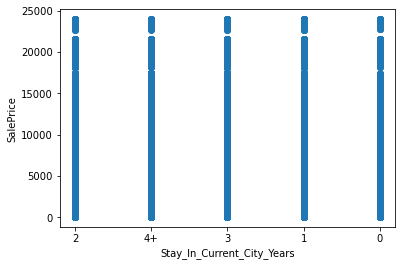

In [27]:
### Comparing Year Features With Sale Price
df = data.copy()

for feature in year_feature:     
    # Plot
    plt.scatter(df[feature],df['Purchase'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

-----------------------------------------------------------------------------------------
## Numerical variables- 2 Types
#### 1. Continuous variable and Discrete variable
----------------------------------------------------------------------------------------
### Analyze Discrete Feature 

In [28]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<=25]
print(len(discrete_feature))
data[discrete_feature].head()

5


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,10,0,3,NaN,NaN
1,10,0,1,6.0,14.0
2,10,0,12,NaN,NaN
3,10,0,12,14.0,NaN
4,16,0,8,NaN,NaN


-----------------------------------------------------------------------------------------
## Find The Relationship Between Discrete_feature and SalePrice

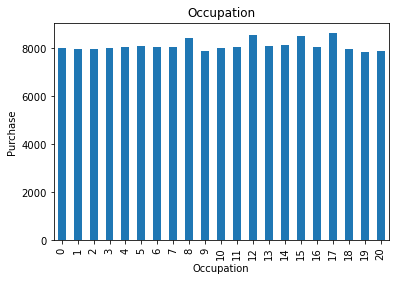

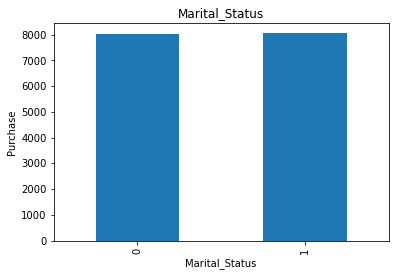

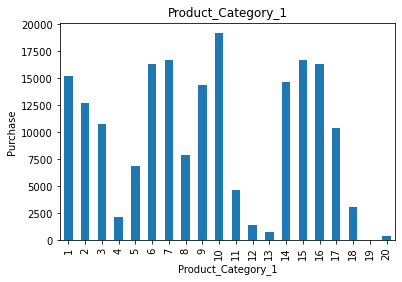

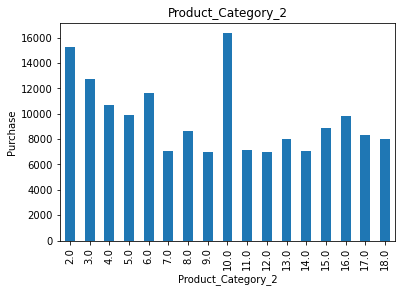

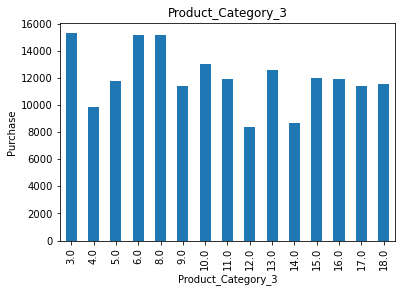

In [29]:
df = data.copy()
for feature in discrete_feature:
    df.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.title(feature)
    plt.show()

There is Relationship With Discrete feature and Purchase

------------------------------------------------------------------
## Analyze Continues Feature

In [30]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature + year_feature]
data[continuous_feature].head()

,User_ID,Purchase
0,1000001,8370
1,1000001,15200
2,1000001,1422
3,1000001,1057
4,1000002,7969


## Lets Analyze the Continuous Values by Creating Histograms to Understand the Distribution

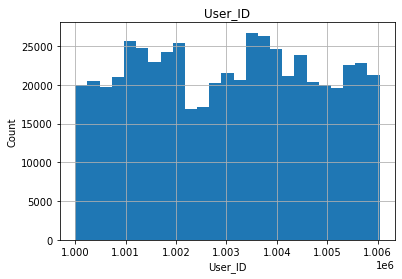

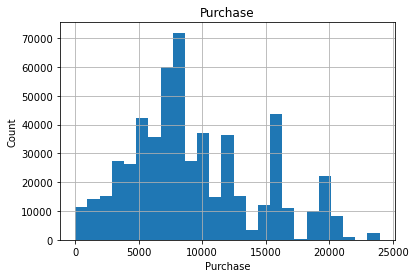

In [31]:
df = data.copy()
for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

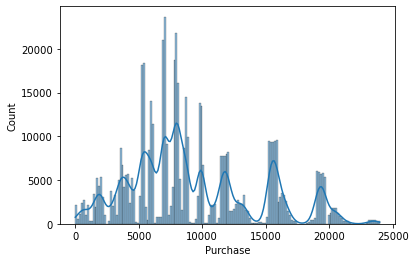

In [32]:
sns.histplot(data['Purchase'],kde=True)

---------------------------------------------------------------------------------------
## Analyze Categorical Feature

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 3. Analysis by 

1. Gender,  
2. purchase by city, 
3. purchase by age group, etc



In [33]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
print(len(categorical_feature))

print(categorical_feature)
data[categorical_feature].head()

5
['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [34]:
data[categorical_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
dtypes: object(5)
memory usage: 21.0+ MB


In [35]:
for feature in categorical_feature:
    print(f"The Feature Name is {feature} and the Number of Categories are {len(data[feature].unique())}")

The Feature Name is Product_ID and the Number of Categories are 3631
The Feature Name is Gender and the Number of Categories are 2
The Feature Name is Age and the Number of Categories are 7
The Feature Name is City_Category and the Number of Categories are 3
The Feature Name is Stay_In_Current_City_Years and the Number of Categories are 5


------------------------------------------------------------------------------------------------------------
### Find the Relationship between Categorical Feature and SalePrice

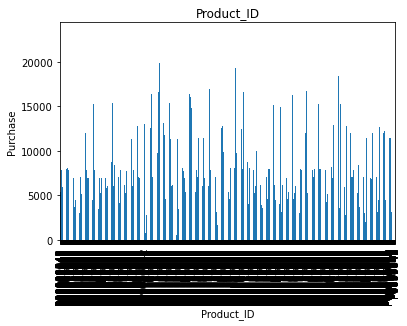

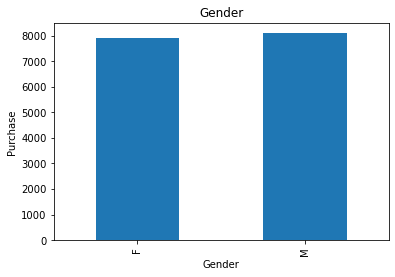

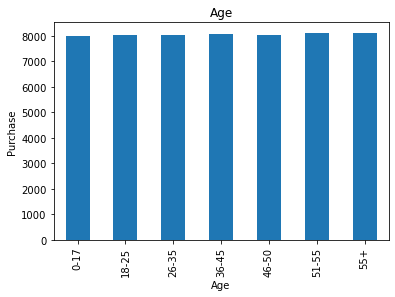

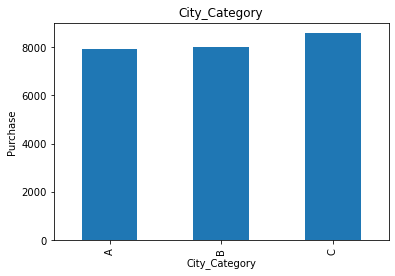

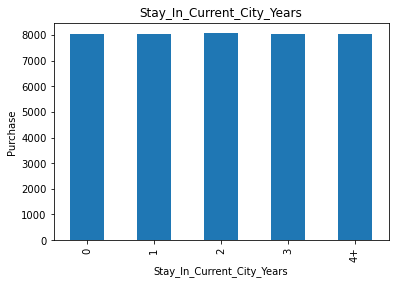

In [36]:
df = data.copy()
for feature in categorical_feature:
    df.groupby(feature)['Purchase'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.title(feature)
    plt.show()

-----------------------------------------------------------------------------------------------------
## Detect Outliers

C:\Users\SHAIKH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

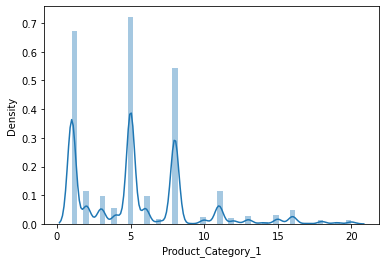

In [37]:
# sns.distplot(df['Age'].dropna())
sns.distplot(data['Product_Category_1'])

In [38]:
data[discrete_feature].columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

-----------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Purchase Distribution

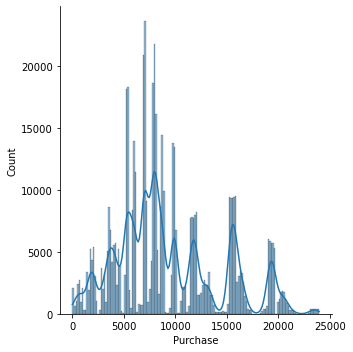

In [39]:
sns.displot(data['Purchase'],kde=True)

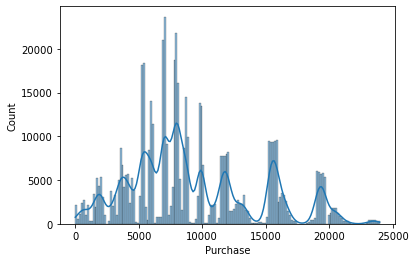

In [40]:
sns.color_palette("cubehelix", as_cmap=True)
sns.histplot(df["Purchase"], kde=True)
plt.show()

------------------------------------------------------------------------------------
-------------------------------------------------------------------------------


# Feature Engineering 


-------------------------------------------------------------------------------------------------------------------------------
## 6. Missing value treatment

In [41]:
for feature in feature_with_nan:
    print(feature ,':', data[feature].unique())

Product_Category_2 : [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 : [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [42]:
for feature in feature_with_nan:
    print(feature , data[feature].dtype)

Product_Category_2 float64
Product_Category_3 float64


C:\Users\SHAIKH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2'>

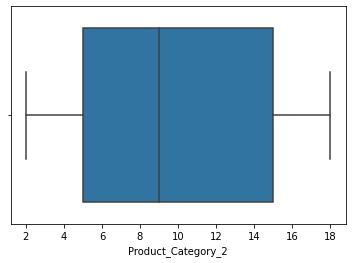

In [43]:
sns.boxplot(data['Product_Category_2'])

There Is Not Outlier in Dataset We Use mean to Handle this missing values

In [44]:
## Handle Missing Values

for feature in feature_with_nan:
    data[feature].fillna(data[feature].mean(), inplace = True)

data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

C:\Users\SHAIKH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3'>

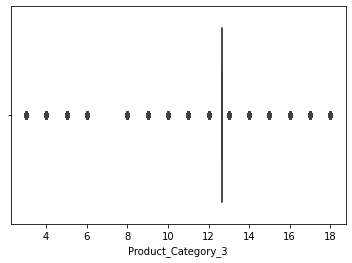

In [45]:
sns.boxplot(data['Product_Category_3'])


##  Convert categorical data into integer using map function (e.g 'Gender' column)


## Convert categorical data into integer Age,  Gender, city

In [46]:

data["City_Category"] = data["City_Category"].map({"A": 0, "B": 1, "C": 2}).astype(int)

data["Gender"] = df["Gender"].map({"F": 0, "M": 1}).astype(int)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0-17,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,55+,16,2,4+,0,8,9.842329,12.668243,7969


In [47]:
data["City_Category"].unique()


array([0, 2, 1])

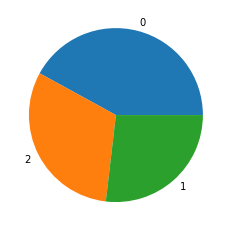

In [48]:
plt.pie(df["City_Category"].value_counts(), labels=["0", "2", "1"],)
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
## 8. Map range variables into integers (e.g 'Age' column)



In [49]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [50]:
# Manual Encoding
data['Age'] = data['Age'].map({'0-17':0 , '55+':7 , '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':1})
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,7,16,2,4+,0,8,9.842329,12.668243,7969


## Handling Outliers

In [51]:


from numpy import percentile

# calculate interquartile range
q25, q75 = percentile(data['Purchase'], 25), percentile(data['Purchase'], 75)

iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5

lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data['Purchase'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data['Purchase'] if x >= lower and x <= upper]

print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=5823.000, 75th=12054.000, IQR=6231.000
Identified outliers: 2677
Non-outlier observations: 547391


In [52]:
data['Purchase'].mean()

9263.968712959126

In [53]:
data['Purchase'].std()

5023.065393820627

In [54]:
data['Purchase'].mean() + 3 *data['Purchase'].std()

24333.164894421006

In [55]:
data['Purchase'].mean() - 3 * data['Purchase'].std()

-5805.227468502755

In [56]:
#### If The Data Is Normally Distributed We use this
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

lower_boundary=data['Purchase'].mean() - 3* data['Purchase'].std()
uppper_boundary=data['Purchase'].mean() + 3* data['Purchase'].std()

print(lower_boundary), print(uppper_boundary),print(data['Purchase'].mean())


-5805.227468502755
24333.164894421006
9263.968712959126


(None, None, None)

 -----------------------------------------------------------------------------------------------   

----------------------------------------------------  ---------------------------------------

# Data Visualisation

### visualize an individual column

1. Age vs Purchased
2. Occupation vs Purchased
3. Productcategory1 vs Purchased
4. Productcategory2 vs Purchased
5. Productcategory3 vs Purchased
6. City category pie chart

## 1. Age vs Purchased

C:\Users\SHAIKH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

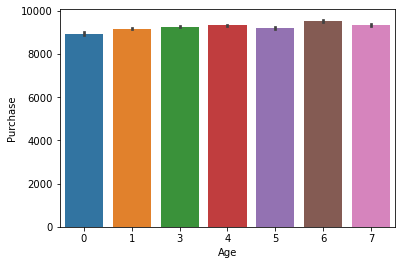

In [57]:
sns.barplot(data['Age'],data['Purchase'])